# Análise do Dataset MovieLens 100k
   ## Carregamento dos Dados

### Verificando as Informações Básicas

In [4]:
import pandas as pd
import os

#### Definindo o caminho para os dados

In [5]:
data_path = 'data/ml-100k/'

#### Carregando arquivo de Avaliações

In [6]:
# Definindo os nomes das colunas
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

# Construindo o caminho completo do arquivo
ratings_file = os.path.join(data_path, 'u.data')

# Lendo o arquivo
ratings = pd.read_csv(ratings_file, sep='\t', names=r_cols, encoding='latin-1')

# Verificando as primeiras linhas e informações básicas
print("--- Ratings Data ---")
print(ratings.head())
print("\nInformações do DataFrame de Ratings:")
ratings.info()
print("\nEstatísticas Descritivas dos Ratings:")
print(ratings.describe())
print(f"\nFormato do DataFrame de Ratings: {ratings.shape}")

--- Ratings Data ---
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

Informações do DataFrame de Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Estatísticas Descritivas dos Ratings:
            user_id       movie_id         rating  unix_timestamp
count  100000.00000  100000.000000  100000.000000    1.000000e+05
mean      462.48475     425.530130       3.529860    8.835289e+08
std       266.61442    

#### Carregando o arquivo de Filmes

In [7]:
# Definindo os nomes das colunas
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
# Adicionando nomes para as colunas de gênero
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
m_cols.extend(genres)

# Construindo o caminho completo do arquivo
movies_file = os.path.join(data_path, 'u.item')

# Lendo o arquivo
movies = pd.read_csv(movies_file, sep='|', names=m_cols, encoding='latin-1')

# Verificando as primeiras linhas e informações básicas
print("\n\n--- Movies Data ---")
print(movies.head())
print("\nInformações do DataFrame de Filmes:")
movies.info()
# A coluna 'title' é a mais relevante para describe neste caso
print("\nEstatísticas Descritivas dos Filmes (Título):")
print(movies['title'].describe())
print(f"\nFormato do DataFrame de Filmes: {movies.shape}")

# Tipos de dados das colunas de gênero
print("\nTipos de dados das colunas de Gênero (exemplo):")
print(movies[genres].dtypes.head())



--- Movies Data ---
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0      

## Verificação de Integridade dos Dados

In [8]:
print("=== Verificação de Integridade dos Dados ===\n")

# Verificando Ratings
print("1. Verificando Ratings:")
print(f"- Total de avaliações: {len(ratings)}")
print(f"- Valores nulos: {ratings.isnull().sum().sum()}")
print(f"- Valores únicos de rating: {sorted(ratings['rating'].unique())}")
print(f"- Range de user_id: {ratings['user_id'].min()} a {ratings['user_id'].max()}")
print(f"- Range de movie_id: {ratings['movie_id'].min()} a {ratings['movie_id'].max()}\n")

# Verificando Movies
print("2. Verificando Movies:")
print(f"- Total de filmes: {len(movies)}")
print(f"- Valores nulos: {movies.isnull().sum().sum()}")
print(f"- Filmes duplicados: {movies['title'].duplicated().sum()}")
print(f"- Range de movie_id: {movies['movie_id'].min()} a {movies['movie_id'].max()}")
print(f"- Gêneros presentes: {sum(movies[genres].sum() > 0)} de {len(genres)} gêneros\n")

# Verificando Relacionamentos
print("3. Verificando Relacionamentos:")
# Verificando se todos os movie_id em ratings existem em movies
movies_in_ratings = set(ratings['movie_id'].unique())
movies_in_movies = set(movies['movie_id'].unique())
print(f"- Filmes em ratings que não estão em movies: {len(movies_in_ratings - movies_in_movies)}\n")

# Verificando distribuição de ratings
print("4. Distribuição de Ratings:")
rating_distribution = ratings['rating'].value_counts().sort_index()
print(rating_distribution)

# Verificando gêneros mais comuns
print("\n5. Gêneros mais comuns:")
genre_counts = movies[genres].sum().sort_values(ascending=False)
print(genre_counts.head(5))

=== Verificação de Integridade dos Dados ===

1. Verificando Ratings:
- Total de avaliações: 100000
- Valores nulos: 0
- Valores únicos de rating: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
- Range de user_id: 1 a 943
- Range de movie_id: 1 a 1682

2. Verificando Movies:
- Total de filmes: 1682
- Valores nulos: 1686
- Filmes duplicados: 18
- Range de movie_id: 1 a 1682
- Gêneros presentes: 19 de 19 gêneros

3. Verificando Relacionamentos:
- Filmes em ratings que não estão em movies: 0

4. Distribuição de Ratings:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64

5. Gêneros mais comuns:
Drama       725
Comedy      505
Action      251
Thriller    251
Romance     247
dtype: int64


## Análise Exploratória de Dados (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a aparência dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para as figuras

### Distribuição das Avaliações (Notas)

/var/folders/4z/5tgg46r14tqf0xydy8s4zk1w0000gn/T/ipykernel_4261/4281408865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


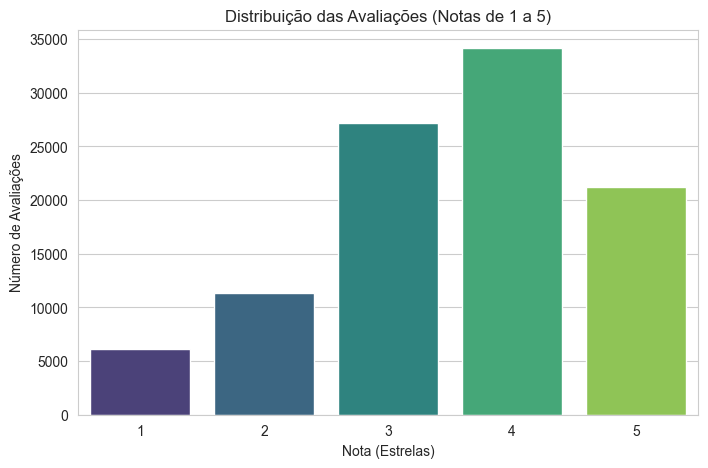


Contagem de cada nota:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(8, 5)) # Ajusta o tamanho desta figura específica
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribuição das Avaliações (Notas de 1 a 5)')
plt.xlabel('Nota (Estrelas)')
plt.ylabel('Número de Avaliações')
plt.show() # Exibe o gráfico

# Também podemos ver a contagem exata
print("\nContagem de cada nota:")
print(ratings['rating'].value_counts().sort_index())

### Número de Avaliações por Usuário

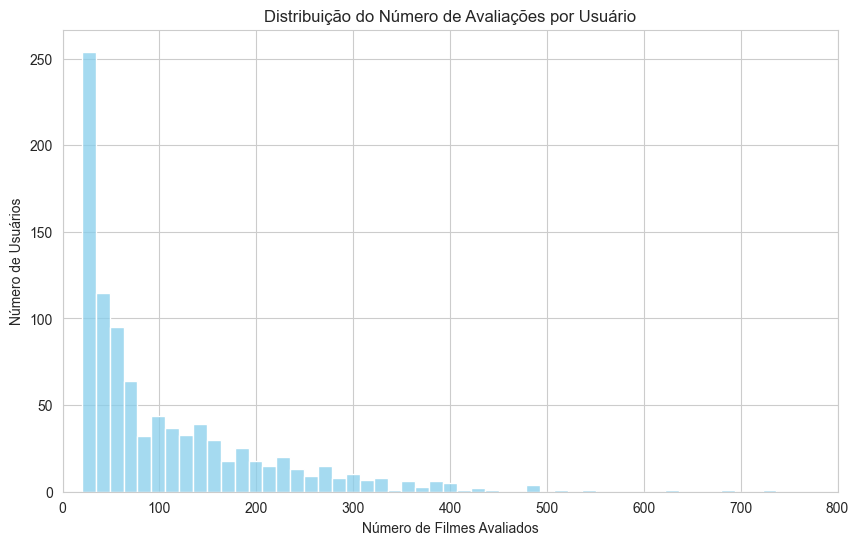


Estatísticas sobre o número de avaliações por usuário:
count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64


In [11]:
# Calcula quantas avaliações cada usuário fez
ratings_per_user = ratings.groupby('user_id')['rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False, color='skyblue')
plt.title('Distribuição do Número de Avaliações por Usuário')
plt.xlabel('Número de Filmes Avaliados')
plt.ylabel('Número de Usuários')
plt.xlim(0, 800) # Ajuste o limite X se necessário para melhor visualização
plt.show()

print("\nEstatísticas sobre o número de avaliações por usuário:")
print(ratings_per_user.describe())

### Número de Avaliações por Filme

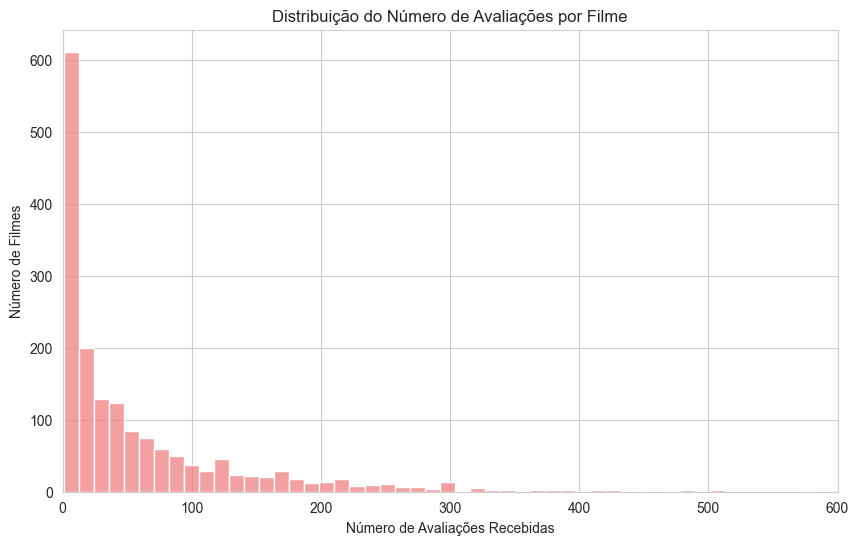


Estatísticas sobre o número de avaliações por filme:
count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64


In [12]:
# Calcula quantas avaliações cada filme recebeu
ratings_per_movie = ratings.groupby('movie_id')['rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False, color='lightcoral')
plt.title('Distribuição do Número de Avaliações por Filme')
plt.xlabel('Número de Avaliações Recebidas')
plt.ylabel('Número de Filmes')
plt.xlim(0, 600) # Ajuste o limite X se necessário
plt.show()

print("\nEstatísticas sobre o número de avaliações por filme:")
print(ratings_per_movie.describe())

### Combinando DataFrames ratings e movies

In [13]:
# Realiza a junção (merge) dos dois DataFrames
movie_data = pd.merge(ratings, movies, on='movie_id', how='left')

# Verifique as primeiras linhas do novo DataFrame combinado
print("--- DataFrame Combinado (Ratings + Movie Info) ---")
print(movie_data.head())

# Verifique as informações e o formato
print("\nInformações do DataFrame Combinado:")
movie_data.info()
print(f"\nFormato do DataFrame Combinado: {movie_data.shape}")

--- DataFrame Combinado (Ratings + Movie Info) ---
   user_id  movie_id  rating  unix_timestamp                       title  \
0      196       242       3       881250949                Kolya (1996)   
1      186       302       3       891717742    L.A. Confidential (1997)   
2       22       377       1       878887116         Heavyweights (1994)   
3      244        51       2       880606923  Legends of the Fall (1994)   
4      166       346       1       886397596         Jackie Brown (1997)   

  release_date  video_release_date  \
0  24-Jan-1997                 NaN   
1  01-Jan-1997                 NaN   
2  01-Jan-1994                 NaN   
3  01-Jan-1994                 NaN   
4  01-Jan-1997                 NaN   

                                            imdb_url  unknown  Action  ...  \
0    http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
1  http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...        0       0  ...   
2  http://us.imdb.com/M/title

### Calculando a Nota Média e o Número de Avaliações por Filme

In [14]:
# Agrupa por título do filme e calcula a média e a contagem das avaliações
movie_stats = movie_data.groupby('title').agg(
    rating_mean=('rating', 'mean'), # Calcula a média da coluna 'rating'
    rating_count=('rating', 'count') # Calcula a contagem da coluna 'rating'
).reset_index() # Transforma o resultado agrupado de volta em um DataFrame

# Renomeia as colunas para clareza (opcional, mas bom)
movie_stats.rename(columns={'rating_mean': 'Nota Média', 'rating_count': 'Nº de Avaliações'}, inplace=True)

# Veja os filmes com mais avaliações
print("\n--- Filmes com Mais Avaliações ---")
print(movie_stats.sort_values('Nº de Avaliações', ascending=False).head(10))

# Veja os filmes com maior nota média (cuidado com filmes com poucas avaliações!)
print("\n--- Filmes com Maior Nota Média (Geral) ---")
print(movie_stats.sort_values('Nota Média', ascending=False).head(10))


--- Filmes com Mais Avaliações ---
                              title  Nota Média  Nº de Avaliações
1398               Star Wars (1977)    4.358491               583
333                  Contact (1997)    3.803536               509
498                    Fargo (1996)    4.155512               508
1234      Return of the Jedi (1983)    4.007890               507
860                Liar Liar (1997)    3.156701               485
460     English Patient, The (1996)    3.656965               481
1284                  Scream (1996)    3.441423               478
1523               Toy Story (1995)    3.878319               452
32             Air Force One (1997)    3.631090               431
744   Independence Day (ID4) (1996)    3.438228               429

--- Filmes com Maior Nota Média (Geral) ---
                                                  title  Nota Média  \
1472                     They Made Me a Criminal (1939)         5.0   
944          Marlene Dietrich: Shadow and Light (19

### Relação entre Nota Média e Número de Avaliações

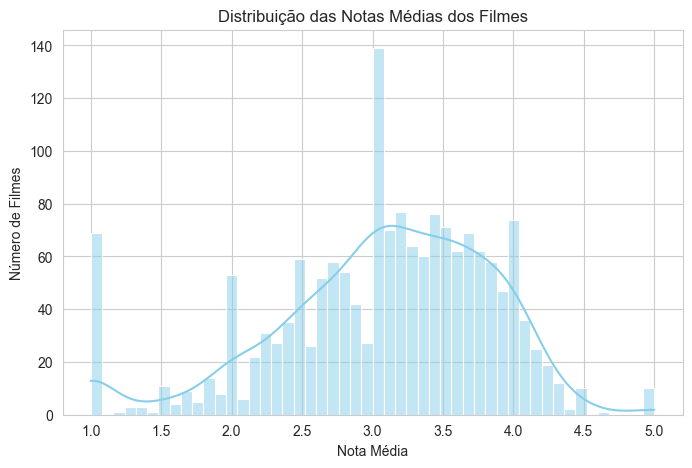

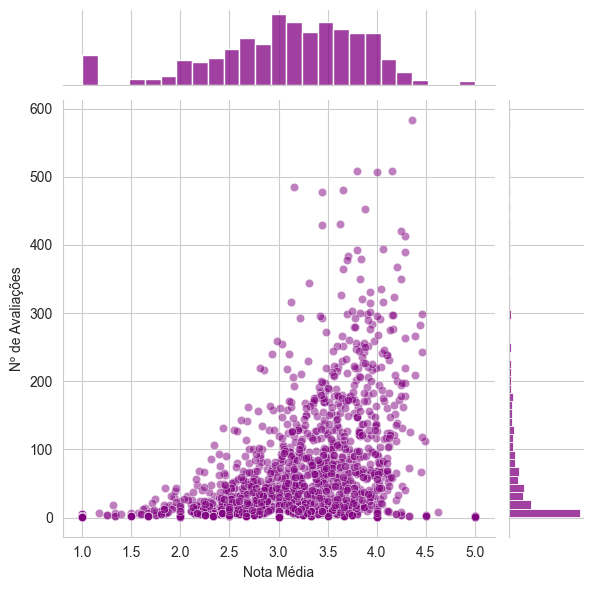


--- Filmes com Maior Nota Média (com pelo menos 50 avaliações) ---
                                                  title  Nota Média  \
318                               Close Shave, A (1995)    4.491071   
1281                            Schindler's List (1993)    4.466443   
1652                         Wrong Trousers, The (1993)    4.466102   
273                                   Casablanca (1942)    4.456790   
1597  Wallace & Gromit: The Best of Aardman Animatio...    4.447761   
1317                   Shawshank Redemption, The (1994)    4.445230   
1215                                 Rear Window (1954)    4.387560   
1572                         Usual Suspects, The (1995)    4.385768   
1398                                   Star Wars (1977)    4.358491   
3                                   12 Angry Men (1957)    4.344000   

      Nº de Avaliações  
318                112  
1281               298  
1652               118  
273                243  
1597                67  


In [15]:
# Histograma das Notas Médias
plt.figure(figsize=(8, 5))
sns.histplot(movie_stats['Nota Média'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição das Notas Médias dos Filmes')
plt.xlabel('Nota Média')
plt.ylabel('Número de Filmes')
plt.show()

# Gráfico de Dispersão: Nota Média vs Número de Avaliações
# Usar jointplot do Seaborn é interessante pois mostra as distribuições marginais
sns.jointplot(x='Nota Média', y='Nº de Avaliações', data=movie_stats, alpha=0.5, color='purple')
# plt.suptitle('Nota Média vs. Número de Avaliações por Filme', y=1.02) # Título para jointplot
plt.show()

# Filtrando para ver filmes com um número mínimo de avaliações
min_reviews = 50
popular_well_rated = movie_stats[movie_stats['Nº de Avaliações'] >= min_reviews]
print(f"\n--- Filmes com Maior Nota Média (com pelo menos {min_reviews} avaliações) ---")
print(popular_well_rated.sort_values('Nota Média', ascending=False).head(10))

## Análise de Gêneros

### Contagem de Filmes por Gênero

/var/folders/4z/5tgg46r14tqf0xydy8s4zk1w0000gn/T/ipykernel_4261/3339176168.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')


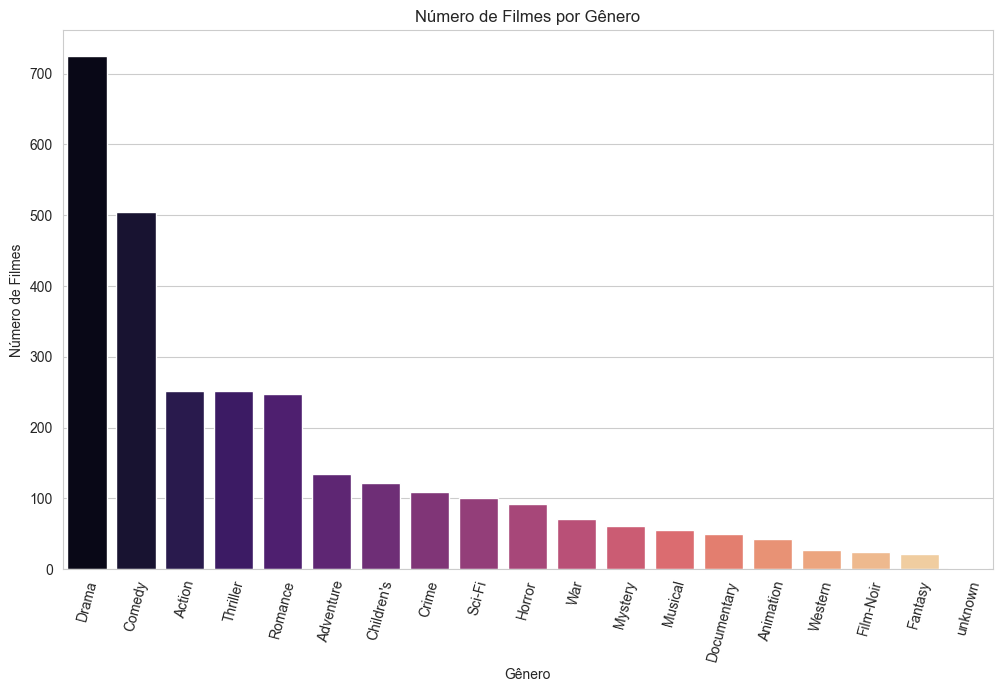


--- Contagem de Filmes por Gênero ---
Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          2
dtype: int64


In [16]:
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calcula a soma de filmes para cada gênero
genre_counts = movies[genres].sum().sort_values(ascending=False)

# Visualiza a contagem de filmes por gênero
plt.figure(figsize=(12, 7)) # Aumenta o tamanho para melhor visualização dos rótulos
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title('Número de Filmes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=75) # Rotaciona os nomes dos gêneros para evitar sobreposição
plt.show()

print("\n--- Contagem de Filmes por Gênero ---")
print(genre_counts)

### Preparação para Análise de Avaliações por Gênero

In [17]:
# Recalcula as estatísticas por filme, mantendo movie_id e title
# Utiliza o DataFrame 'movie_data'
movie_stats_id = movie_data.groupby(['movie_id', 'title']).agg(
    rating_mean=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Seleciona as colunas relevantes de 'movies' (id, gêneros)
movie_genres = movies[['movie_id'] + genres]

# Junta as estatísticas com as informações de gênero usando movie_id
genre_stats = pd.merge(movie_stats_id, movie_genres, on='movie_id', how='left')

print("\n--- DataFrame Combinado para Análise de Gênero (Stats + Genres) ---")
print(genre_stats.head())


--- DataFrame Combinado para Análise de Gênero (Stats + Genres) ---
   movie_id              title  rating_mean  rating_count  unknown  Action  \
0         1   Toy Story (1995)     3.878319           452        0       0   
1         2   GoldenEye (1995)     3.206107           131        0       1   
2         3  Four Rooms (1995)     3.033333            90        0       0   
3         4  Get Shorty (1995)     3.550239           209        0       1   
4         5     Copycat (1995)     3.302326            86        0       0   

   Adventure  Animation  Children's  Comedy  ...  Fantasy  Film-Noir  Horror  \
0          0          1           1       1  ...        0          0       0   
1          1          0           0       0  ...        0          0       0   
2          0          0           0       0  ...        0          0       0   
3          0          0           0       1  ...        0          0       0   
4          0          0           0       0  ...        0     

### Nota Média e Popularidade Média por Gênero

/var/folders/4z/5tgg46r14tqf0xydy8s4zk1w0000gn/T/ipykernel_4261/517768542.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_series.index, y=avg_rating_series.values, palette='coolwarm')


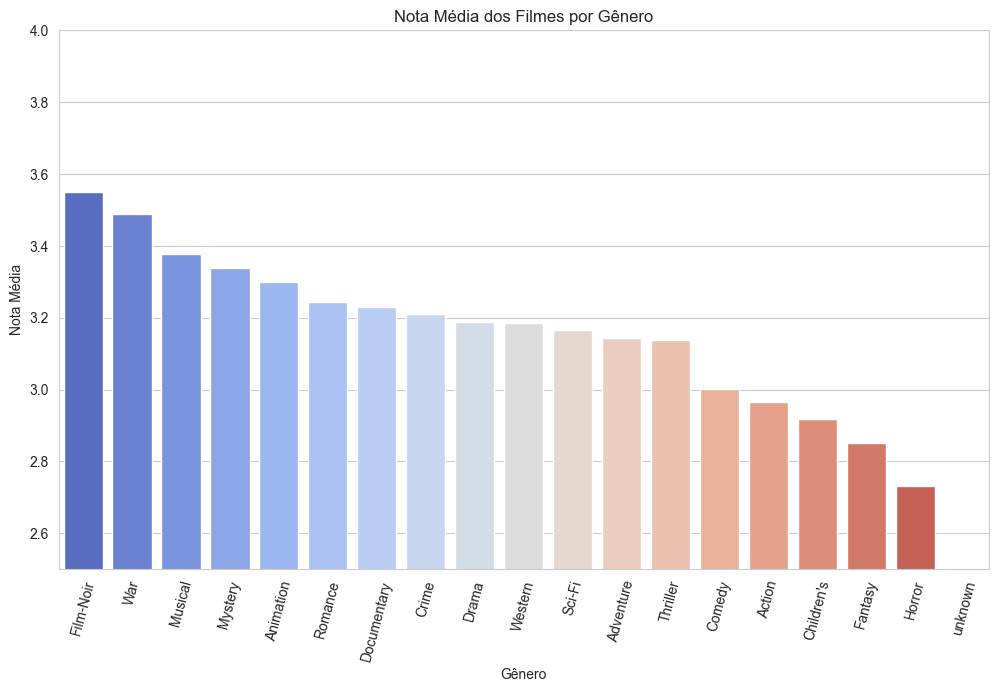


--- Nota Média por Gênero ---
Film-Noir      3.548351
War            3.489185
Musical        3.376423
Mystery        3.336814
Animation      3.298813
Romance        3.244049
Documentary    3.229273
Crime          3.211015
Drama          3.187353
Western        3.185617
Sci-Fi         3.165446
Adventure      3.143967
Thriller       3.136692
Comedy         3.000565
Action         2.966332
Children's     2.916885
Fantasy        2.849830
Horror         2.730157
unknown        2.222222
dtype: float64


/var/folders/4z/5tgg46r14tqf0xydy8s4zk1w0000gn/T/ipykernel_4261/517768542.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_series.index, y=avg_popularity_series.values, palette='viridis')


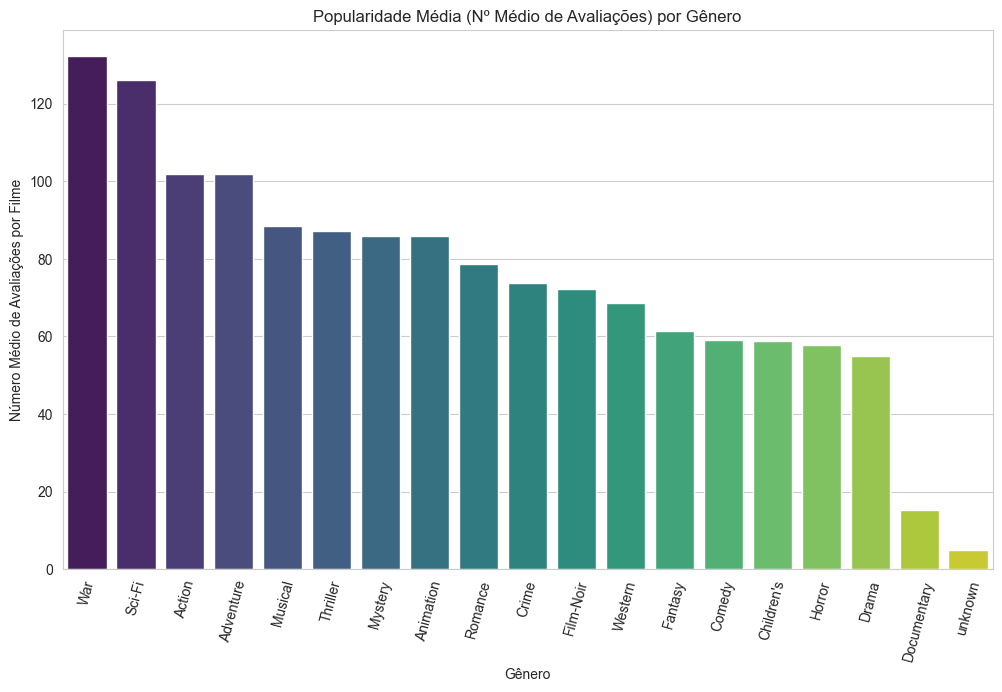


--- Popularidade Média por Gênero ---
War            132.366197
Sci-Fi         126.039604
Action         101.948207
Adventure      101.874074
Musical         88.464286
Thriller        87.139442
Mystery         85.983607
Animation       85.833333
Romance         78.789474
Crime           73.899083
Film-Noir       72.208333
Western         68.666667
Fantasy         61.454545
Comedy          59.073267
Children's      58.868852
Horror          57.793478
Drama           55.027586
Documentary     15.160000
unknown          5.000000
dtype: float64


In [18]:
# Dicionários para armazenar os resultados
avg_rating_by_genre = {}
avg_popularity_by_genre = {} # Popularidade como número médio de avaliações

# Itera sobre cada gênero (exceto 'unknown')
for genre in genres:
    if genre == 'unknown' and genre_stats[genre].sum() == 0: # Pula 'unknown' se não houver filmes
         continue
    # Filtra os filmes que pertencem ao gênero atual
    genre_subset = genre_stats[genre_stats[genre] == 1]

    if not genre_subset.empty:
        # Calcula a média da nota média para os filmes deste gênero
        avg_rating = genre_subset['rating_mean'].mean()
        avg_rating_by_genre[genre] = avg_rating

        # Calcula a média do número de avaliações para os filmes deste gênero
        avg_popularity = genre_subset['rating_count'].mean()
        avg_popularity_by_genre[genre] = avg_popularity
    else:
         avg_rating_by_genre[genre] = 0
         avg_popularity_by_genre[genre] = 0

# Converte os resultados em Series do Pandas para facilitar a plotagem
avg_rating_series = pd.Series(avg_rating_by_genre).sort_values(ascending=False)
avg_popularity_series = pd.Series(avg_popularity_by_genre).sort_values(ascending=False)

# Visualiza a Nota Média por Gênero
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_series.index, y=avg_rating_series.values, palette='coolwarm')
plt.title('Nota Média dos Filmes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota Média')
plt.xticks(rotation=75)
plt.ylim(2.5, 4.0) # Ajusta o limite Y para melhor visualização das diferenças
plt.show()
print("\n--- Nota Média por Gênero ---")
print(avg_rating_series)

# Visualiza a Popularidade Média (Nº Médio de Avaliações) por Gênero
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_popularity_series.index, y=avg_popularity_series.values, palette='viridis')
plt.title('Popularidade Média (Nº Médio de Avaliações) por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número Médio de Avaliações por Filme')
plt.xticks(rotation=75)
plt.show()
print("\n--- Popularidade Média por Gênero ---")
print(avg_popularity_series)

## Implementação da Filtragem Baseada em Conteúdo (Usando Gêneros)

### 1. Preparação dos Dados para Conteúdo

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re # Para expressões regulares

# Cópia do DataFrame para evitar modificar o original diretamente
movies_content = movies.copy()

# 1. Limpar os títulos (remover o ano no final, se presente)
def limpar_titulo(titulo):
    # Remove (xxxx) no final da string
    return re.sub(r'\s*\(\d{4}\)$', '', titulo).strip()

movies_content['cleaned_title'] = movies_content['title'].apply(limpar_titulo)

# 2. Criar a string de gêneros
def get_genres_string(row):
    active_genres = []
    for genre in genres:
         # Verifica se a coluna do gênero existe e se o valor é 1
         if genre in row.index and row[genre] == 1:
             # Adiciona o nome do gênero à lista (remove espaços/apóstrofos para TF-IDF)
             active_genres.append(genre.replace("'", "").replace("-", ""))
    return ' '.join(active_genres)

movies_content['genres_string'] = movies_content.apply(get_genres_string, axis=1)

# Verifica as novas colunas
print("--- DataFrame de Filmes com Título Limpo e String de Gêneros ---")
print(movies_content[['movie_id', 'title', 'cleaned_title', 'genres_string']].head())

# Lidando com filmes sem gênero (se houver a coluna 'unknown' e ela for a única)
print(f"\nFilmes com string de gênero vazia: {movies_content[movies_content['genres_string'] == ''].shape[0]}")

--- DataFrame de Filmes com Título Limpo e String de Gêneros ---
   movie_id              title cleaned_title               genres_string
0         1   Toy Story (1995)     Toy Story  Animation Childrens Comedy
1         2   GoldenEye (1995)     GoldenEye   Action Adventure Thriller
2         3  Four Rooms (1995)    Four Rooms                    Thriller
3         4  Get Shorty (1995)    Get Shorty         Action Comedy Drama
4         5     Copycat (1995)       Copycat        Crime Drama Thriller

Filmes com string de gênero vazia: 0


### 2. Vetorização TF-IDF dos Gêneros

In [28]:
# Inicializa o vetorizador TF-IDF
# stop_words='english' poderia ser útil se usássemos descrições, mas não é crucial para gêneros
# min_df=1 garante que mesmo gêneros raros sejam considerados
tfidf_vectorizer = TfidfVectorizer(stop_words=None, min_df=1)

# Aplica o TF-IDF na coluna de strings de gênero
# fillna('') trata casos onde a string de gênero possa ser NaN (improvável aqui, mas seguro)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_content['genres_string'].fillna(''))

# Verifique o formato da matriz TF-IDF (deve ser n_filmes x n_gêneros_unicos)
print(f"\nFormato da Matriz TF-IDF: {tfidf_matrix.shape}")

# Veja alguns dos "features" (gêneros) que o TF-IDF identificou
print("\nAlguns nomes de features (gêneros) identificados pelo TF-IDF:")
print(list(tfidf_vectorizer.get_feature_names_out()))


Formato da Matriz TF-IDF: (1682, 19)

Alguns nomes de features (gêneros) identificados pelo TF-IDF:
['action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'unknown', 'war', 'western']


### 3. Cálculo da Similaridade de Cosseno

In [32]:
# Calcula a matriz de similaridade de cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Verifica o formato da matriz de similaridade (deve ser n_filmes x n_filmes)
print(f"\nFormato da Matriz de Similaridade de Cosseno: {cosine_sim.shape}")

# Exemplo de valores de similaridade (ex: similaridade do segundo filme com os 5 primeiros)
print("\nExemplo de Similaridade (Filme 0 com Filmes 0-4):")
print(cosine_sim[1, :5])


Formato da Matriz de Similaridade de Cosseno: (1682, 1682)

Exemplo de Similaridade (Filme 0 com Filmes 0-4):
[0.         1.         0.53676706 0.38145435 0.30700538]


### 4. Mapeamento Título -> Índice

In [34]:
# Cria um mapeamento do título limpo para o índice do DataFrame
# O índice original do DataFrame movies_content corresponde às linhas das matrizes
indices = pd.Series(movies_content.index, index=movies_content['cleaned_title']).drop_duplicates()

print("\nExemplo de Mapeamento Título -> Índice:")
try:
    print(f"'Toy Story' -> Índice {indices['Toy Story']}")
    print(f"'GoldenEye' -> Índice {indices['GoldenEye']}")
except KeyError as e:
    print(f"Erro ao buscar título: {e}. Verifique se o título existe na coluna 'cleaned_title'.")


Exemplo de Mapeamento Título -> Índice:
'Toy Story' -> Índice 0
'GoldenEye' -> Índice 1
